In [51]:
import word_score
import modules
text="It was okay"
score=word_score.get_tuple(text)
score=list(score)
score

it {'neg_score': '0', 'pos_score': '0'}
okay {'neg_score': '0', 'pos_score': '0.375'}


[0.38, 0.0]

In [52]:
import csv
rulebase=[]
with open("rulebase.csv") as csv_file:
    reader=csv.reader(csv_file)
    rulebase.append(next(reader))
    for row in reader:
        c=row[-1]
        row=[float(val) for val in row[:-1]]+[row[-1]]
        rulebase.append(row)
rulebase[:]

[['pos_score', 'neg_score', 'class'],
 [0.25, 1.38, 'b'],
 [0.25, 0.75, 'b'],
 [0.25, 0.75, 'b'],
 [0.0, 0.88, 'b'],
 [0.25, 2.0, 'b'],
 [1.5, 0.0, 'g'],
 [1.25, 0.62, 'g'],
 [1.12, 0.12, 'g'],
 [1.62, 0.25, 'g'],
 [1.0, 0.0, 'g'],
 [3.0, 0.0, 'g'],
 [0.38, 0.25, 'n'],
 [0.38, 0.0, 'n'],
 [0.38, 0.62, 'n'],
 [0.0, 0.5, 'n'],
 [0.62, 0.0, 'n']]

In [53]:
neighbours=[]
def knn(k):
    
    output=None
    distance={}
    for i in range(len(rulebase[1:])):
        p1=rulebase[i+1][:-1]
        
        distance[i+1]=round(modules.distance(len(p1),p1,score),2)
    #print(distance,"\n")
    distance = sorted(distance.items(), key=lambda x: x[1])
    
    #print(distance,"\n")
    distance=distance[:k]
    print(distance,"\n")
    global neighbours
    neighbours=[rulebase[i[0]][:-1] for i in distance]
    print(neighbours)
    g_count=b_count=n_count=0
    
    for i in distance:
        if rulebase[i[0]][-1]=='g':
            g_count+=1
        elif rulebase[i[0]][-1]=='b':
            b_count+=1
        elif rulebase[i[0]][-1]=='n':
            n_count+=1
       
        if(g_count== max(g_count,b_count,n_count)):
            output='g'
        if(b_count== max(g_count,b_count,n_count)):
            output='b'
       
        if(n_count== max(g_count,b_count,n_count)):
            output='n'
    print("output:", output)

In [54]:
knn(4)


[0.25, 1.38] [0.38, 0.0]
[0.25, 0.75] [0.38, 0.0]
[0.25, 0.75] [0.38, 0.0]
[0.0, 0.88] [0.38, 0.0]
[0.25, 2.0] [0.38, 0.0]
[1.5, 0.0] [0.38, 0.0]
[1.25, 0.62] [0.38, 0.0]
[1.12, 0.12] [0.38, 0.0]
[1.62, 0.25] [0.38, 0.0]
[1.0, 0.0] [0.38, 0.0]
[3.0, 0.0] [0.38, 0.0]
[0.38, 0.25] [0.38, 0.0]
[0.38, 0.0] [0.38, 0.0]
[0.38, 0.62] [0.38, 0.0]
[0.0, 0.5] [0.38, 0.0]
[0.62, 0.0] [0.38, 0.0]
[(13, 0.0), (16, 0.24), (12, 0.25), (10, 0.62)] 

[[0.38, 0.0], [0.62, 0.0], [0.38, 0.25], [1.0, 0.0]]
output: n


In [55]:

g=[tuple(row[:-1]) for row in rulebase if row[-1]=='g']
b=[tuple(row[:-1]) for row in rulebase if row[-1]=='b']
n=[tuple(row[:-1]) for row in rulebase if row[-1]=='n']
g,b,n,neighbours

([(1.5, 0.0),
  (1.25, 0.62),
  (1.12, 0.12),
  (1.62, 0.25),
  (1.0, 0.0),
  (3.0, 0.0)],
 [(0.25, 1.38), (0.25, 0.75), (0.25, 0.75), (0.0, 0.88), (0.25, 2.0)],
 [(0.38, 0.25), (0.38, 0.0), (0.38, 0.62), (0.0, 0.5), (0.62, 0.0)],
 [[0.38, 0.0], [0.62, 0.0], [0.38, 0.25], [1.0, 0.0]])

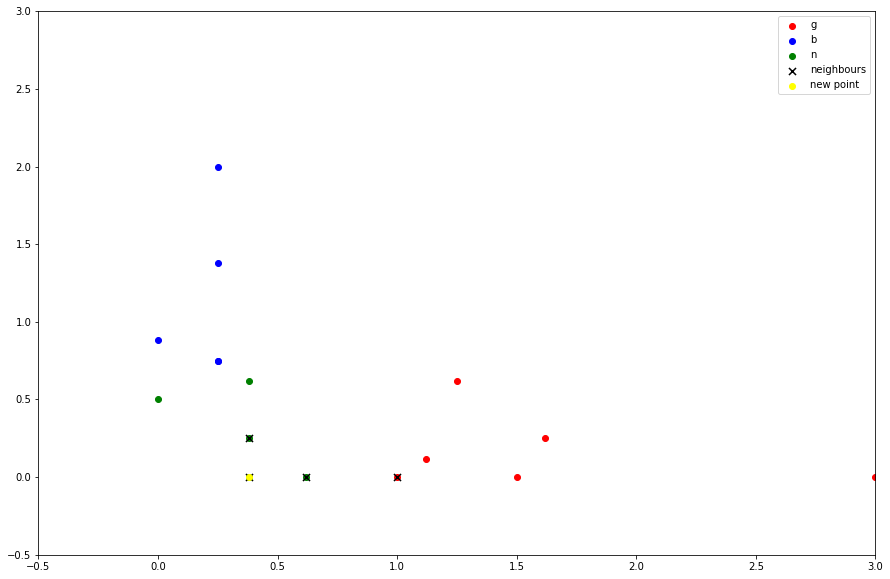

In [56]:
colors=["#0000FF", "#00FF00", "#FF0066"]

%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
fig = pyplot.figure(figsize=(15,10))
#ax = fig.add_subplot(111, projection='3d')
score=[score]
if len(g)>0:
    plt.scatter(*zip(*g),label='g',color="red")
if len(b)>0:
    plt.scatter(*zip(*b),label='b',color="blue")
if len(n)>0:
    plt.scatter(*zip(*n),label='n',color="green")
plt.scatter(*zip(*neighbours),label='neighbours',marker='x',color="black",s=50)
plt.scatter(*zip(*score),label="new point",color="yellow")

#ax.scatter(0,0,10,marker='x')
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)

plt.legend()